In [1]:
!pip install -q opendatasets

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import graphviz
import opendatasets as od

# **Train a Decision Tree Classifier and visualize the tree**

## Loading dataset from Kaggle

In [3]:
od.download_kaggle_dataset(dataset_url='https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset', data_dir='dataset')

csv_file_path = "/content/dataset/heart-disease-dataset/heart.csv"
data = pd.read_csv(csv_file_path)

data.head()

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joisesarakkal
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


100%|██████████| 6.18k/6.18k [00:00<00:00, 5.67MB/s]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Split features and target

In [4]:
X = data.drop('target', axis=1)
y = data['target']

## Train/Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a Decision Tree Classifier

In [6]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Evaluate on test data

In [7]:
y_pred_tree = dtree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {acc_tree}")

Decision Tree Accuracy: 0.9853658536585366


## Visualize decision tree

In [8]:
dot_data = export_graphviz(
    dtree,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_heart", format="png", cleanup=True)

print("Decision tree visualization saved as 'decision_tree_heart.png'.")

Decision tree visualization saved as 'decision_tree_heart.png'.


# **Analyze overfitting and control tree depth**

# Controlling overfitting: limiting tree depth


In [9]:
depths = range(1, 11)
train_scores = []
test_scores = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

# Display results
for d, train_s, test_s in zip(depths, train_scores, test_scores):
    print(f"max_depth={d} --> Train Acc: {train_s:.2f}, Test Acc: {test_s:.2f}")

max_depth=1 --> Train Acc: 0.76, Test Acc: 0.75
max_depth=2 --> Train Acc: 0.77, Test Acc: 0.68
max_depth=3 --> Train Acc: 0.85, Test Acc: 0.78
max_depth=4 --> Train Acc: 0.88, Test Acc: 0.80
max_depth=5 --> Train Acc: 0.93, Test Acc: 0.84
max_depth=6 --> Train Acc: 0.95, Test Acc: 0.88
max_depth=7 --> Train Acc: 0.97, Test Acc: 0.92
max_depth=8 --> Train Acc: 0.99, Test Acc: 0.98
max_depth=9 --> Train Acc: 1.00, Test Acc: 0.98
max_depth=10 --> Train Acc: 1.00, Test Acc: 0.99


Effect of `max_depth` on Decision Tree plot


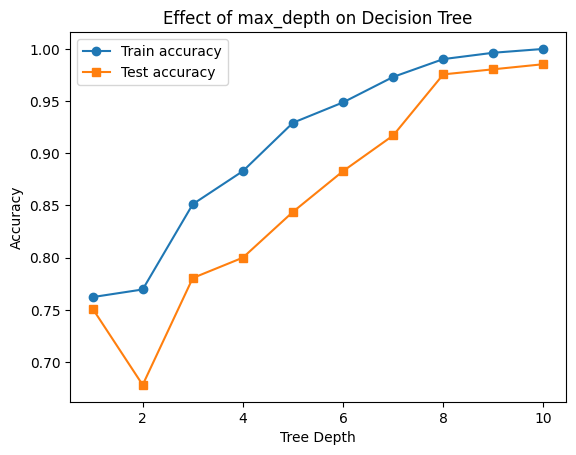

In [10]:
plt.plot(depths, train_scores, marker='o', label='Train accuracy')
plt.plot(depths, test_scores, marker='s', label='Test accuracy')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Effect of max_depth on Decision Tree")
plt.legend()
plt.show()

# **Train a Random Forest and compare accuracy**

## Train a Random Forest

In [11]:
rforest = RandomForestClassifier(n_estimators=100, random_state=42)
rforest.fit(X_train, y_train)
y_pred_rf = rforest.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {acc_rf}")

Random Forest Test Accuracy: 0.9853658536585366


Comparing `acc_tree` and `acc_rf` we get to know that both the model performs almost the same on `heart disease` dataset

# **Interpret feature importances**

## Get feature importances

In [12]:
importances = rforest.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)
importance_df

,feature,importance
2,cp,0.135072
11,ca,0.127327
7,thalach,0.122169
9,oldpeak,0.121905
12,thal,0.110518
0,age,0.077908
4,chol,0.074822
3,trestbps,0.071171
8,exang,0.057594
10,slope,0.045782


# plot feature importances

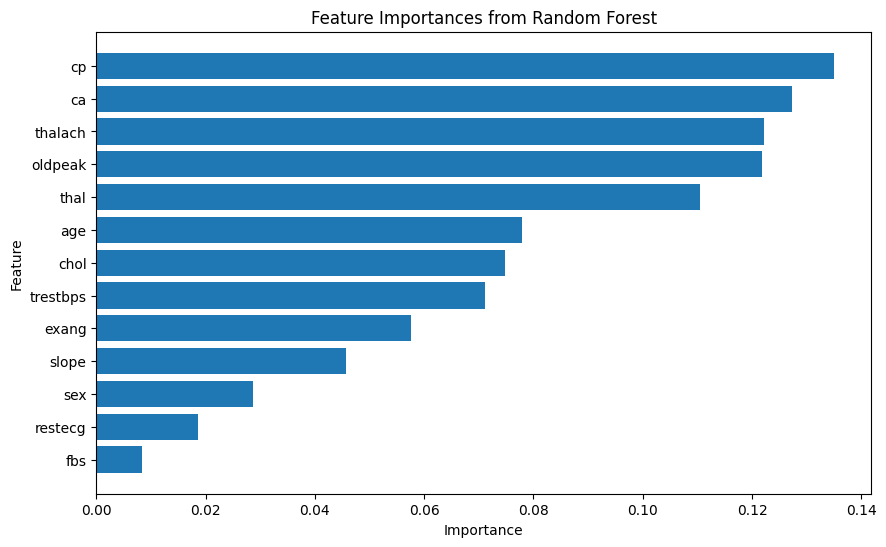

In [13]:
plt.figure(figsize=(10,6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances from Random Forest")
plt.gca().invert_yaxis()
plt.show()

# **Evaluate using cross-validation**

## 5-fold cross-validation

In [14]:
cv_scores = cross_val_score(rforest, X, y, cv=5)
print("Random Forest Cross-validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Random Forest Cross-validation Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Score: 0.9970731707317073
